<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>


# PRE HOMEWORK

# Case 3: Fifa 2022 world cup

<a target="_blank" href="https://colab.research.google.com/github/DACSS-CSSmeths/Networks_intro/blob/main/case3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Let me use some information about countries from the 2022 [Fifa World Cup](https://en.wikipedia.org/wiki/2022_FIFA_World_Cup_squads). I have added som attributes for the countrues and the clubs with the help from ChatGpt (these attributes may not be accurate).

* For the _club_: if the club was the national champion in its country the year before the world cup
* For the _country_: if the country  is considered developed or not.

In [2]:
from IPython.display import IFrame

IFrame('https://docs.google.com/spreadsheets/d/e/2PACX-1vTjk__2p0MTF5Oh_qmJ9PQpk-QN71HXKzxIYBcvKe09YiGYDD9tL1FlZ7BIiAL2rx_4wdF8mOWziGl9/pubhtml', 800, 350)

Let's use the data from GitHub:

In [3]:
import pandas as pd

fifaLink = "https://github.com/DACSS-CSSmeths/Networks_intro/raw/refs/heads/main/casesData/fifa2022.xlsx"
fifa=pd.read_excel(fifaLink,sheet_name='fifa2022')
fifa.head()

,idnum,pos,name,dob,caps,goals,club,group,nationality,age2022
0,1,GK,Hernán Galíndez,1987-03-30,12,0,Aucas,A,Ecuador,35
1,2,DF,Félix Torres,1997-01-11,17,2,Santos Laguna,A,Ecuador,25
2,3,DF,Piero Hincapié,2002-01-09,21,1,Bayer Leverkusen,A,Ecuador,20
3,4,DF,Robert Arboleda,1991-10-22,33,2,São Paulo,A,Ecuador,31
4,5,MF,José Cifuentes,1999-03-12,11,0,Los Angeles FC,A,Ecuador,23


This shows data for every player in the cup. Let's pay attention to three variables:

In [4]:
fifa.loc[:,['name','club','nationality']]

,name,club,nationality
0,Hernán Galíndez,Aucas,Ecuador
1,Félix Torres,Santos Laguna,Ecuador
2,Piero Hincapié,Bayer Leverkusen,Ecuador
3,Robert Arboleda,São Paulo,Ecuador
4,José Cifuentes,Los Angeles FC,Ecuador
...,...,...,...
826,Martín Cáceres,LA Galaxy,Uruguay
827,Sergio Rochet,Nacional,Uruguay
828,Agustín Canobbio,Athletico Paranaense,Uruguay
829,Manuel Ugarte,Sporting CP,Uruguay


Pay attention! ... it is obvious we could have a _bipartite_ network here.

Let's try this one with players and club:

In [5]:
import networkx as nx

fifanet1 = nx.Graph()
fifanet1.add_nodes_from(fifa.name, bipartite=0) # Add the node attribute "bipartite"
fifanet1.add_nodes_from(fifa.club, bipartite=1) # Add the node attribute "bipartite"
fifanet1.add_edges_from([c for c in zip(fifa.name,fifa.club)])

In [6]:
from networkx.algorithms import bipartite


players_nodes,clubs_nodes = bipartite.sets(fifanet1)
# Draw bipartite graph
pos = nx.bipartite_layout(fifanet1, players_nodes,align='horizontal',aspect_ratio=1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=True, node_color = color_list)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

As you see, here you have a problem with the code
```
players_nodes,clubs_nodes = bipartite.sets(fifanet1)
```

That is bad news. Let me show you an alternative way to that line of code:

In [7]:
players_nodes = {n for n, d in fifanet1.nodes(data=True) if d["bipartite"] == 0}
clubs_nodes = set(fifanet1) - players_nodes

Now, draw the graph:

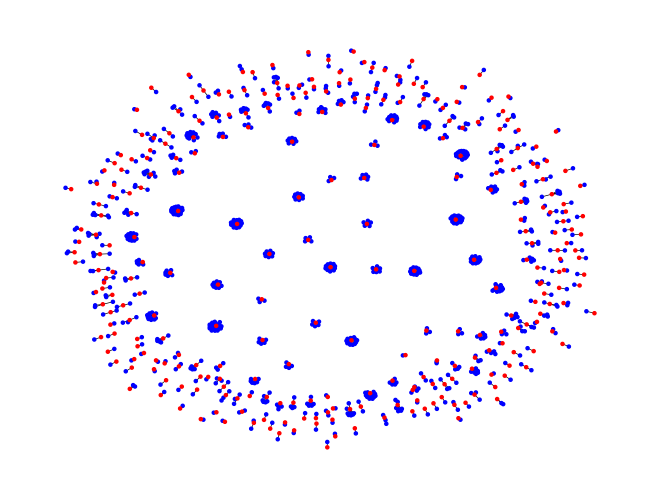

In [8]:
pos = nx.spring_layout(fifanet1)
color_dict = {0:'b',1:'r'}
color_list = [color_dict[i[1]] for i in fifanet1.nodes.data('bipartite')]
nx.draw(fifanet1, pos=pos, with_labels=False,node_size=5,width=0.5,node_color = color_list)

As you may have guessed, the clubs divide the players, so in the data we have, it is NOT possible that a player belongs to two clubs. In our example above, an actor can be in more than one movie. If you install pydot you could see this graph:

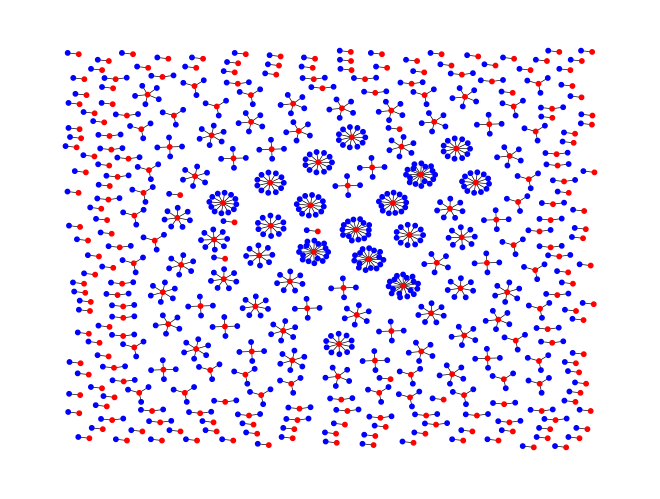

In [9]:
pos = nx.nx_pydot.graphviz_layout(fifanet1)
nx.draw(fifanet1, pos=pos, with_labels=False, node_size=10, node_color = color_list,width=0.5)

I created a bipartite graph between players and countries. I added the players and countries as the nodes to complete such.

In [10]:
import networkx as nx

fifanet2 = nx.Graph()
fifanet2.add_nodes_from(fifa.name, bipartite=0)
fifanet2.add_nodes_from(fifa.nationality, bipartite=1)
fifanet2.add_edges_from([c for c in zip(fifa.name, fifa.nationality)])

In [11]:
players_nodes = {n for n, d in fifanet2.nodes(data=True) if d["bipartite"] == 0}
countries_nodes = set(fifanet2) - players_nodes

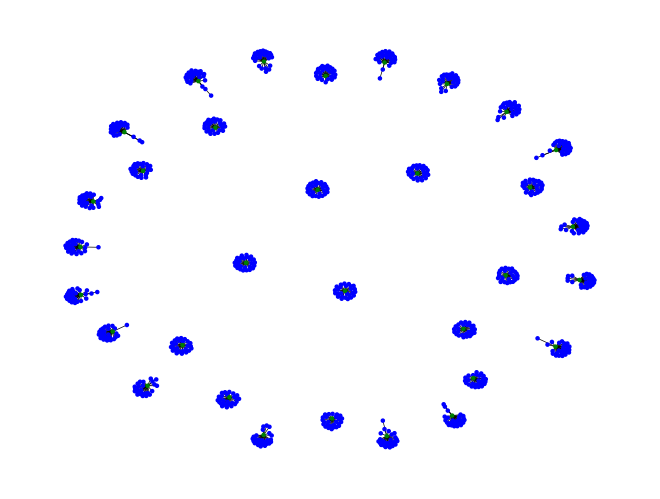

In [12]:
pos = nx.spring_layout(fifanet2)
color_dict = {0:'b',1:'g'}
color_list = [color_dict[i[1]] for i in fifanet2.nodes.data('bipartite')]
nx.draw(fifanet2, pos=pos, with_labels=False, node_size=5, width=0.5, node_color=color_list)

As we see here, player to country would work!

I created a bipartite graph between clubs and countries. I added clubs, then countries, and then proceeded to add edges between clubs and countries.

In [13]:
fifanet3 = nx.Graph()
fifanet3.add_nodes_from(fifa.club, bipartite=0)
fifanet3.add_nodes_from(fifa.nationality, bipartite=1)
fifanet3.add_edges_from([(club, country) for club, country in zip(fifa.club, fifa.nationality)])

In [14]:
clubs_nodes = {n for n, d in fifanet3.nodes(data=True) if d["bipartite"] == 0}
countries_nodes = set(fifanet3) - clubs_nodes

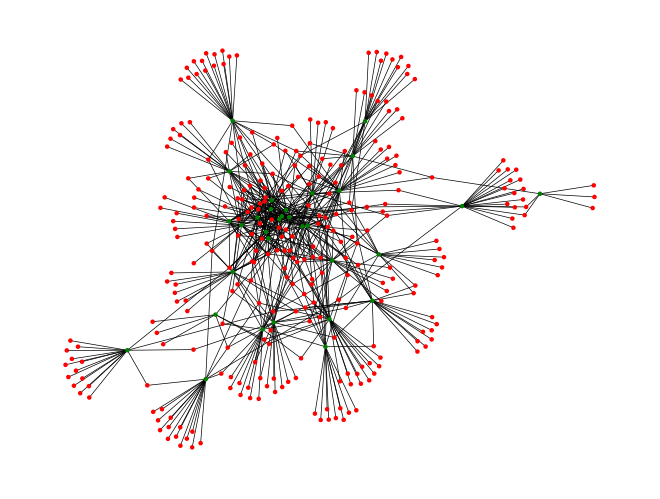

In [15]:
pos = nx.spring_layout(fifanet3)
color_dict = {0:'r', 1:'g'}
color_list = [color_dict[i[1]] for i in fifanet3.nodes.data('bipartite')]
nx.draw(fifanet3, pos=pos, with_labels=False, node_size=5, width=0.5, node_color=color_list)

Above is what shows from my code.


Below I project the bipartite graph to create the club-club graph, and then proceed to draw the club-club projection.

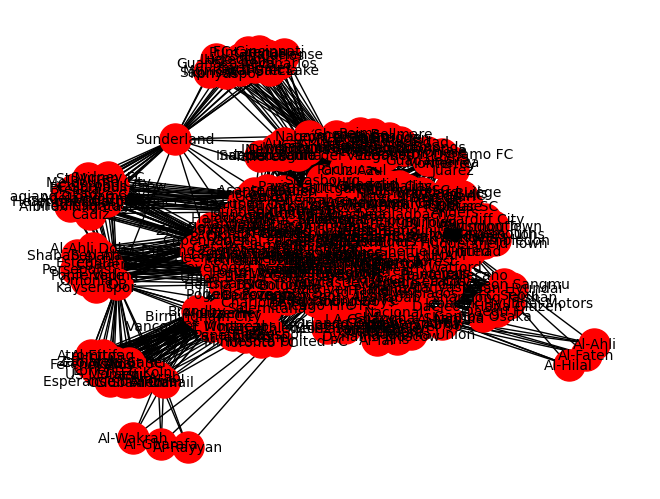

In [16]:
club_club_projection = bipartite.projected_graph(fifanet3, clubs_nodes)

pos_club_club = nx.spring_layout(club_club_projection)
nx.draw(club_club_projection, pos=pos_club_club, with_labels=True, node_size=500, node_color='r', font_size=10)

Above is what I got as a result. That is seriously all over the place. Lets continue.


Below, I projected the bipartite graph to create the country-country graph, and then drew the country-country projection.

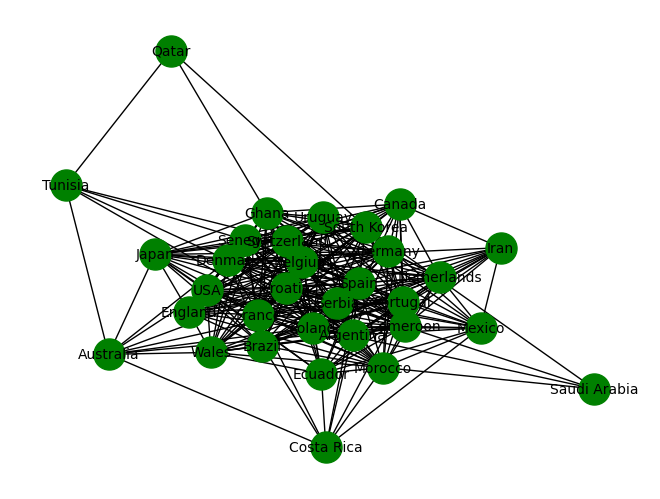

In [17]:
country_country_projection = bipartite.projected_graph(fifanet3, countries_nodes)

pos_country_country = nx.spring_layout(country_country_projection)
nx.draw(country_country_projection, pos=pos_country_country, with_labels=True, node_size=500, node_color='g', font_size=10)

I create the graphs in order to save them to my files.

In [18]:
nx.write_graphml(club_club_projection, "club_club_projection.graphml")
nx.write_graphml(country_country_projection, "country_country_projection.graphml")

In [19]:
print("Both club and country projection GraphML's file saved successfully!")

Both club and country projection GraphML's file saved successfully!


Next, I calcuated the degree centrality for the club-club graph.

In [20]:
degree_centrality = nx.degree_centrality(club_club_projection)
print(degree_centrality)

{'Omonia': 0.05102040816326531, 'Brentford': 0.24149659863945577, 'São Paulo': 0.06802721088435373, 'Fenerbahçe': 0.11904761904761904, 'Sampdoria': 0.19387755102040816, 'Alajuelense': 0.05442176870748299, 'Red Bull Salzburg': 0.19387755102040816, 'Ferencváros': 0.07142857142857142, 'Al-Nassr': 0.10204081632653061, 'Guanacasteca': 0.05442176870748299, 'Sunderland': 0.11904761904761904, 'OB': 0.13605442176870747, 'Union Berlin': 0.07482993197278912, 'St Mirren': 0.06462585034013606, 'Heerenveen': 0.047619047619047616, 'West Ham United': 0.15986394557823128, 'Eintracht Frankfurt': 0.2789115646258503, 'FC Cincinnati': 0.05442176870748299, 'Real Madrid': 0.23809523809523808, 'Getafe': 0.061224489795918366, 'US Monastir': 0.07142857142857142, 'Sheffield United': 0.12585034013605442, 'Manchester City': 0.24489795918367346, 'Chelsea': 0.3469387755102041, 'Adelaide United': 0.06462585034013606, 'Valencia': 0.21428571428571427, 'VfL Bochum': 0.0782312925170068, 'Asante Kotoko': 0.081632653061224

I then calculated the betweenness centrality for the country-country graph.

In [21]:
betweenness_centrality = nx.betweenness_centrality(country_country_projection)
print(betweenness_centrality)

{'USA': 0.010231023235117912, 'Tunisia': 0.00613027951737629, 'Switzerland': 0.019251712598611626, 'Uruguay': 0.005356224479863749, 'Netherlands': 0.007727301466690261, 'England': 0.002506665530983917, 'France': 0.011859403593399402, 'Iran': 0.0018416440190633738, 'Morocco': 0.023918097809289256, 'Senegal': 0.016999455800514422, 'Wales': 0.007417468808660259, 'Germany': 0.004804802596673164, 'Ghana': 0.04046040345501046, 'Ecuador': 0.009385365403042422, 'Serbia': 0.010749341928309269, 'Belgium': 0.004778497863237702, 'Mexico': 0.0071122594000352915, 'Spain': 0.011616827805282814, 'Qatar': 0.0008602150537634409, 'Japan': 0.00585132398699761, 'Denmark': 0.026373652785067946, 'Australia': 0.008089691073562041, 'Brazil': 0.008991987258241126, 'Poland': 0.04254346266455524, 'Portugal': 0.014155421101641015, 'South Korea': 0.0374435779274489, 'Canada': 0.003901051944345663, 'Croatia': 0.01729689919218532, 'Argentina': 0.0180565457582835, 'Cameroon': 0.027877334288749448, 'Costa Rica': 0.0034

I drew the graph highlighting central nodes using degree centrality.

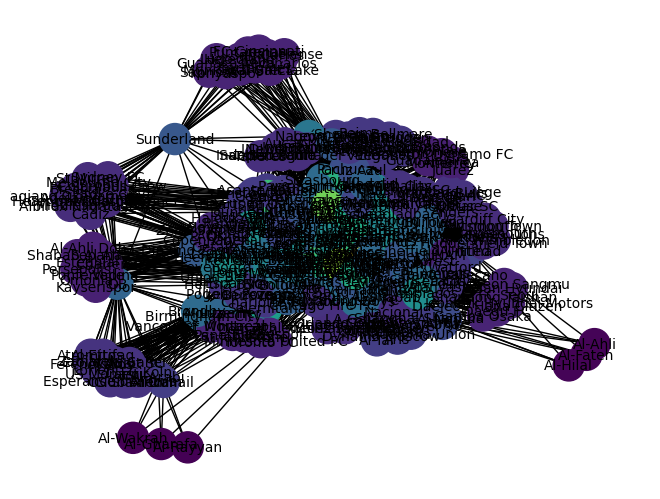

In [22]:
nx.draw(club_club_projection, pos=pos_club_club, with_labels=True, node_size=500, font_size=10, node_color=[degree_centrality[n] for n in club_club_projection.nodes()])

As this one is not working, do you think "player-country"  would work?
Prepare it, and test your answer.

Prepare the bipartite "club-country", and create two graphs, one where club is projected, and another where country is projected. What is the meaning of the edges in each case?

Save both projected graphs (weighted) as _graphml_. Include the attributes for the nodes that will be projected.

__________

Go back to the [INTRO](https://dacss-cssmeths.github.io/Networks_intro/)